# Supervised ML - Predicting fake news using only titles

In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from nltk.stem import PorterStemmer
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# from wordcloud import WordCloud ##### Deprecated

import tensorflow as tf

In [46]:
data = pd.read_csv('news_articles.csv')
data

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2092,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,NaN,1.0
2093,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,NaN,1.0
2094,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN,1.0
2095,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,NaN,0.0


In [47]:
data = data.dropna(axis=0)
data

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2042,Matt Barber,2016-10-27T03:04:50.327+03:00,why never trumpers must reconsider,prof canoes reek of genocide white privilege c...,english,wnd.com,No Image URL,bias,Real,trump vs clinton risk vs disaster,check hillarythemed haunted house anticlinton ...,0.0
2043,Jane Chastain,2016-10-27T03:04:50.704+03:00,election crossroads socialism or capitalism,teens walk free after gangrape conviction judg...,english,wnd.com,No Image URL,bias,Real,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,1.0
2044,Michael Brown,2016-10-27T03:04:54.788+03:00,reasons ill vote for trump,school named for munichmassacre mastermind ter...,english,wnd.com,http://mobile.wnd.com/files/2011/12/leftfield3...,bias,Real,youtube bans clintons black son,skype sex scam fortune built shame moroccan bo...,1.0
2045,Ann Coulter,2016-10-27T03:05:01.989+03:00,our new country women and minorities hit hardest,wars and rumors of wars russia unveils satan ...,english,wnd.com,http://www.wnd.com/files/2016/10/danney-willll...,bias,Real,wikileaks bombshells hillary need know,posted eddie skyhigh potency may scare away cr...,1.0


# Exploratory Data Analysis
- We'll explore how frequent some words appear in the titles

In [48]:
def get_top_n_words(corpus, n = None):
    """
    A function that returns the top 'n' unigrams used in the corpus
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus) ## Shape: (2045, 46774) -> There are 2045 sentences and 46774 words
    sum_words = bag_of_words.sum(axis=0) ## Shape: (1, 46774) -> Count of occurance of each word
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] ## vec.vocabulary_.items returns the dictionary with (word, index)
    freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return freq_sorted[:n]

def get_top_n_bigram(corpus, n = None):
    """
    A function that returns the top 'n' bigrams used in the corpus
    """
    vec = CountVectorizer(ngram_range = (2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return freq_sorted[:n]

In [49]:
top_unigram = get_top_n_words(data['title_without_stopwords'], 20)
words_unigram = [i[0] for i in top_unigram]
count_unigram = [i[1] for i in top_unigram]

top_bigram = get_top_n_bigram(data['text_without_stopwords'], 20)
words_bigram = [i[0] for i in top_bigram]
count_bigram = [i[1] for i in top_bigram]

<ipython-input-50-0d2a09df5844>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words_unigram, fontdict=font_text, rotation=90)


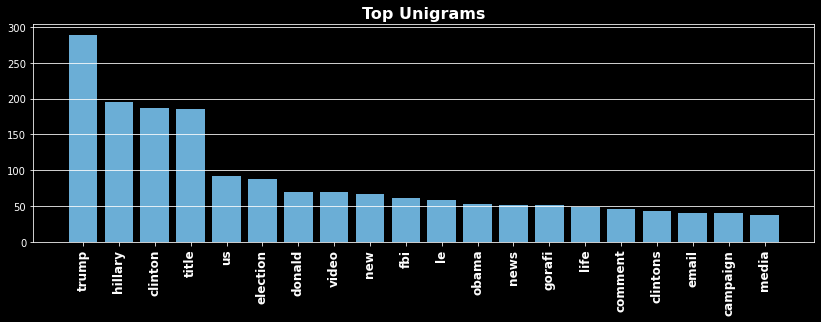

In [50]:
# Plot bar charts for top unigrams
font_title = {'family': 'sans serif',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
font_text = {'family': 'sans serif',
        'color':  'white',
        'weight': 'bold',
        'size': 12,
        }

with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(14,4))
    bar = ax.bar(words_unigram, count_unigram, color='#6baed6')
    ax.set_title("Top Unigrams", fontdict=font_title, size=16)
    ax.set_xticklabels(words_unigram, fontdict=font_text, rotation=90)
    ax.grid(axis='y')

<ipython-input-51-ef5b8b12aeca>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words_bigram, fontdict=font_text, rotation=90)


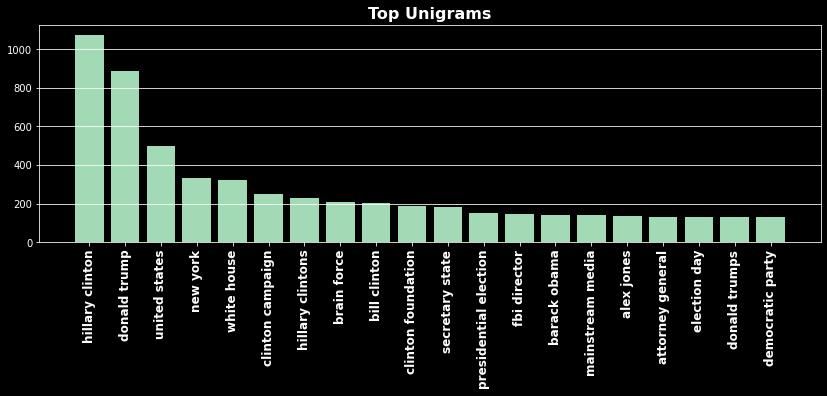

In [51]:
# Plot bar charts for top bigrams
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(14,4))
    bar = ax.bar(words_bigram, count_bigram, color='#a1dab4')
    ax.set_title("Top Unigrams", fontdict=font_title, size=16)
    ax.set_xticklabels(words_bigram, fontdict=font_text, rotation=90)
    ax.grid(axis='y')

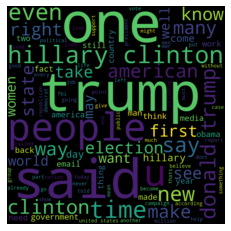

In [52]:
# Visualising frequency of words using WordCloud package
from wordcloud import WordCloud

wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(data['text_without_stopwords']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

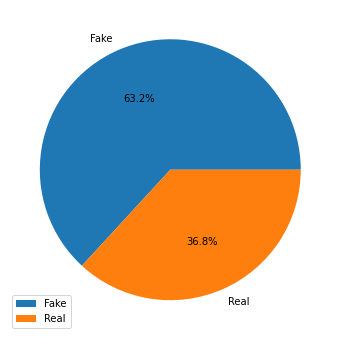

In [53]:
## Visualising the fake and real news percentage
import math
different_labels = data['label'].unique()
counts = data['label'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(count, labels=['Fake', 'Real'], autopct='%1.1f%%')
plt.legend()

# Preprocessing
- Since the dataset already contained title without stopwords, we would do stemming, tokenisation and padding to produce a sequence of numbers to feed into our ML model later

In [54]:
titles_stopped = data['title_without_stopwords']
titles_stopped.head()

0          muslims busted stole millions govt benefits
1           attorney general loretta lynch plead fifth
2    breaking weiner cooperating fbi hillary email ...
3    pin drop speech father daughter kidnapped kill...
4    fantastic trumps point plan reform healthcare ...
Name: title_without_stopwords, dtype: object

In [55]:
ps = PorterStemmer()
ps

<PorterStemmer>

In [56]:
ps.stem("roasted")

'roast'

In [57]:
def process_title(title):
    new_title = title.split(" ")
    new_title = list(map(lambda x: ps.stem(x), new_title))
    new_title = list(map(lambda x: x.strip(), new_title))
    if '' in new_title:
        new_title.remove('')
    return new_title

In [58]:
titles_stemmed = titles_stopped.apply(process_title)
titles_stemmed

0           [muslim, bust, stole, million, govt, benefit]
1         [attorney, gener, loretta, lynch, plead, fifth]
2       [break, weiner, cooper, fbi, hillari, email, i...
3       [pin, drop, speech, father, daughter, kidnap, ...
4       [fantast, trump, point, plan, reform, healthca...
                              ...                        
2042               [trump, vs, clinton, risk, vs, disast]
2043                   [gingrich, slutsham, megyn, kelli]
2044                   [youtub, ban, clinton, black, son]
2045            [wikileak, bombshel, hillari, need, know]
2046                                        [fascin, sex]
Name: title_without_stopwords, Length: 2044, dtype: object

In [59]:
# Get size of vocabulary
vocabulary = set()

for title in titles_stemmed:
    for word in title:
        if word not in vocabulary:
            vocabulary.add(word)

vocab_length = len(vocabulary)

# Get max length of a sequence
max_seq_length = 0
for title in titles_stemmed:
    if len(title) > max_seq_length:
        max_seq_length = len(title)

In [60]:
# Viewing the words that have been added to our vocabulary
import more_itertools
more_itertools.take(10, vocabulary)

['capex',
 'shame',
 'whichev',
 'hank',
 'dapné',
 'sexcus',
 'sometim',
 'fifth',
 'concept',
 'worst']

In [61]:
vocab_length

4638

In [62]:
max_seq_length

46

In [63]:
# Tokenising and padding our sequences
tokenizer = Tokenizer(num_words=vocab_length)
tokenizer.fit_on_texts(titles_stemmed)

sequences = tokenizer.texts_to_sequences(titles_stemmed)

word_index = tokenizer.word_index

model_inputs = pad_sequences(sequences, maxlen=max_seq_length)

In [64]:
# Viewing the sequences converted from the titles
sequences[:10]

[[116, 665, 1231, 51, 896, 543],
 [452, 126, 453, 188, 1232, 1233],
 [74, 367, 2013, 12, 3, 14, 28],
 [897, 898, 304, 2014, 544, 1234, 46, 47, 13, 8, 1235, 1, 165],
 [2015, 1, 666, 82, 1236, 2016, 454, 667, 165],
 [3, 368, 668, 2017, 42, 127, 7],
 [74,
  2018,
  305,
  75,
  117,
  367,
  2019,
  2020,
  899,
  669,
  1237,
  2021,
  1238,
  2022,
  216,
  2023,
  2024,
  900,
  1239,
  901,
  165],
 [455,
  456,
  217,
  2025,
  306,
  252,
  25,
  218,
  1,
  24,
  305,
  1240,
  2026,
  2027,
  5,
  369,
  1241,
  7,
  165],
 [74, 2, 2028, 2029, 457, 670, 902, 1242, 3, 1243, 165],
 [671, 3, 15, 2030, 2031, 2032, 903, 2033, 1244, 2034, 128, 1, 2035, 7, 165]]

In [65]:
# Viewing the words mapped to tokens, with 1 being the most frequent word
import more_itertools
more_itertools.take(10, word_index.items())

[('trump', 1),
 ('clinton', 2),
 ('hillari', 3),
 ('titl', 4),
 ('elect', 5),
 ('us', 6),
 ('video', 7),
 ('donald', 8),
 ('obama', 9),
 ('le', 10)]

In [66]:
# Viewing the effect of padding the sequences
model_inputs

array([[   0,    0,    0, ...,   51,  896,  543],
       [   0,    0,    0, ...,  188, 1232, 1233],
       [   0,    0,    0, ...,    3,   14,   28],
       ...,
       [   0,    0,    0, ...,    2,   48,  128],
       [   0,    0,    0, ...,    3,   79,   84],
       [   0,    0,    0, ...,    0, 1627,  216]])

In [67]:
model_inputs.shape

(2044, 46)

In [68]:
data['label'].unique()

array(['Real', 'Fake'], dtype=object)

In [69]:
labels = np.array(data['label'].map(dict(Real=0, Fake=1)))
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Training

In [70]:
X_train, X_test, y_train, y_test = train_test_split(model_inputs, labels, random_state=1)

In [71]:
print('shape of X_train:', X_train.shape)
print('shape of y_train:', y_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_test:', y_test.shape)

shape of X_train: (1533, 46)
shape of y_train: (1533,)
shape of X_test: (511, 46)
shape of y_test: (511,)


In [72]:
y_train

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [73]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [74]:
embedding_dim = 64

inputs = tf.keras.Input(shape=(max_seq_length,))

embedding = tf.keras.layers.Embedding(
    input_dim=vocab_length,
    output_dim=embedding_dim,
    input_length=max_seq_length,
)(inputs)

gru = tf.keras.layers.GRU(units=embedding_dim)(embedding)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(gru)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

batch_size = 16
epochs = 5

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True)
    ]
)

Epoch 1/5
77/77 [==============================] - 5s 27ms/step - loss: 0.6569 - accuracy: 0.6232 - auc: 0.5553 - val_loss: 0.6419 - val_accuracy: 0.6189 - val_auc: 0.6523
Epoch 2/5
77/77 [==============================] - 1s 18ms/step - loss: 0.4882 - accuracy: 0.7316 - auc: 0.8458 - val_loss: 0.6510 - val_accuracy: 0.6580 - val_auc: 0.7200
Epoch 3/5
77/77 [==============================] - 1s 17ms/step - loss: 0.2499 - accuracy: 0.8801 - auc: 0.9643 - val_loss: 0.7694 - val_accuracy: 0.6417 - val_auc: 0.6773
Epoch 4/5
77/77 [==============================] - 1s 17ms/step - loss: 0.1339 - accuracy: 0.9282 - auc: 0.9887 - val_loss: 1.1881 - val_accuracy: 0.6612 - val_auc: 0.6828
Epoch 5/5
77/77 [==============================] - 1s 17ms/step - loss: 0.0965 - accuracy: 0.9494 - auc: 0.9933 - val_loss: 1.3519 - val_accuracy: 0.6515 - val_auc: 0.6765


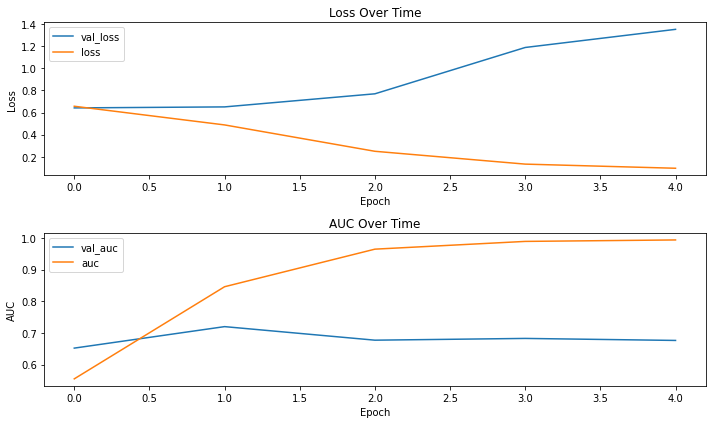

In [75]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax1.plot(history.history['val_loss'])
ax1.plot(history.history['loss'])
ax2.plot(history.history['val_auc'])
ax2.plot(history.history['auc'])

ax1.legend(['val_loss', 'loss'])
ax2.legend(['val_auc', 'auc'])
ax1.set_title('Loss Over Time')
ax2.set_title('AUC Over Time')
ax1.set(xlabel='Epoch', ylabel='Loss')
ax2.set(xlabel='Epoch', ylabel='AUC')

fig.tight_layout()

In [76]:
history.history

{'loss': [0.6569358110427856,
  0.48815420269966125,
  0.24986723065376282,
  0.13391947746276855,
  0.09654267877340317],
 'accuracy': [0.6231647729873657,
  0.7316476106643677,
  0.8800978660583496,
  0.9282218813896179,
  0.9494290351867676],
 'auc': [0.5553348660469055,
  0.8458084464073181,
  0.9642619490623474,
  0.9887089729309082,
  0.9933002591133118],
 'val_loss': [0.6419411301612854,
  0.6510226130485535,
  0.7693746089935303,
  1.1880500316619873,
  1.351939082145691],
 'val_accuracy': [0.6188924908638,
  0.6579804420471191,
  0.6416938304901123,
  0.6612377762794495,
  0.6514657735824585],
 'val_auc': [0.6522508859634399,
  0.7200027108192444,
  0.6772711277008057,
  0.6828087568283081,
  0.6764639616012573],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001]}

In [77]:
model.load_weights('./model.h5')

In [78]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 6ms/step - loss: 0.6290 - accuracy: 0.6595 - auc: 0.6565


[0.6289677023887634, 0.6594911813735962, 0.656451404094696]

# Discussion
-   The final result is an accuracy of about 67%. The results could be further improved if the texts of the articles are used, even better is we could append the texts to the titles and processed it altogether.

-   Further work can look at using LIME or SHAP values to explain how the model has identified what words would carry more weightings to classify whether a news article is real or fake.